# 1. What are the active reports?

In [1]:
import os
import pandas as pd
from datetime import datetime, date

In [2]:
os.listdir("data/Salesforce/Objects")

['ReportEvent_50k_Sample.csv',
 'DataLoad_Exception_Log__c_5k_sample.csv',
 'EventLogFile_all_sample.csv',
 'Report_all_sample.csv',
 'ExceptionLogger__c_5k_sample.csv',
 'EventDefinition_1k_samples.csv',
 'FieldDefinition_all_sample.csv']

## Loading reports

In [3]:
reports = pd.read_csv("data/Salesforce/Objects/Report_all_sample.csv")

In [4]:
reports.shape

(17397, 18)

In [5]:
list(reports.columns)

['CreatedById',
 'CreatedDate',
 'Description',
 'DeveloperName',
 'FolderName',
 'Format',
 'Id',
 'IsDeleted',
 'LastModifiedById',
 'LastModifiedDate',
 'LastReferencedDate',
 'LastRunDate',
 'LastViewedDate',
 'Name',
 'NamespacePrefix',
 'OwnerId',
 'ReportTypeApiName',
 'SystemModstamp']

In [6]:
reports.head()

,CreatedById,CreatedDate,Description,DeveloperName,FolderName,Format,Id,IsDeleted,LastModifiedById,LastModifiedDate,LastReferencedDate,LastRunDate,LastViewedDate,Name,NamespacePrefix,OwnerId,ReportTypeApiName,SystemModstamp
0,0050b000004MLGeAAO,2018-06-20T19:28:03.000Z,NaN,Email2Case_KPI_Wp9,Public Reports,Summary,00O0b000004kSKkEAM,False,0050b000004MLGeAAO,2019-10-16T03:00:16.000Z,2022-06-20T02:04:59.000Z,2022-06-20T02:04:59.000Z,2022-06-20T02:04:59.000Z,Email2Case KPI,NaN,00D0b000000GaMpEAK,CaseList@Case.MaritzCX__Survey_Response_Id__c,2022-06-20T02:04:59.000Z
1,0050b000004KRSoAAO,2021-08-18T13:14:25.000Z,NaN,Milestone_Report_by_Pallavi_Reddy,Public Reports,Summary,00O2R000003JUgNUAW,False,0050b000004KRSoAAO,2021-08-19T07:27:05.000Z,2022-06-19T18:20:34.000Z,2022-04-18T05:30:14.000Z,2022-06-19T18:20:34.000Z,APJ RDC PM Team - Milestone Report,NaN,00D0b000000GaMpEAK,Project_with_Order_Milestone_Product__c,2022-04-18T05:30:14.000Z
2,0050b000004KRSoAAO,2021-08-18T14:53:32.000Z,NaN,APJ_RDC_PM_Current_Quarter_Milestones,Public Reports,Summary,00O2R000003JUh6UAG,False,0050b000004KRSoAAO,2021-08-19T07:08:48.000Z,NaN,2022-05-25T08:03:16.000Z,NaN,APJ RDC PM - Current Quarter Milestones,NaN,00D0b000000GaMpEAK,Project_with_Order_Milestone_Product__c,2022-05-25T08:03:16.000Z
3,0050b000004KVKcAAO,2021-05-06T17:43:54.000Z,Show QTD Earned Revenue - Milestones that have...,C_C_QTD_Earned_Revenue1,Public Reports,Summary,00O2R000003s1qaUAA,False,0050b000004KVKcAAO,2021-08-09T21:37:07.000Z,2022-06-19T18:20:37.000Z,2022-06-15T20:56:37.000Z,2022-06-19T18:20:37.000Z,C&C - QTD Earned Revenue,NaN,00D0b000000GaMpEAK,NaN,2022-06-15T20:56:37.000Z
4,0052R000009nJKyQAM,2020-08-06T07:00:50.000Z,NaN,Germany_Swivel_Projects_2,Public Reports,Tabular,00O2R000003rzEdUAI,False,0050b000004KUjyAAG,2020-09-01T13:03:59.000Z,NaN,2021-10-28T19:18:37.000Z,NaN,Germany Swivel Projects CFQ,NaN,00D0b000000GaMpEAK,NaN,2021-10-28T19:18:37.000Z


In [7]:
reports = reports.dropna(subset=['LastRunDate'])

In [8]:
reports.shape

(17235, 18)

# Sorting by LastRunDate

In [9]:
sortedByLastRunDate = reports.sort_values('LastRunDate', ascending=False)

Let's define a reference date and a time window to consider active reports.

- The reference date may be the most recent date in our sample.
- Let's consider a range of 180 in this analysis.

Since the reports are sorted by `LastRunDate`, our reference date is the first row of the dataframe.

In [10]:
sortedByLastRunDate['LastRunDate'].iloc[0]

'2022-06-20T02:07:25.000Z'

Remove training 'Z' without loss of useful information. (according to this [reference](https://social.msdn.microsoft.com/Forums/en-US/27c2f2a9-8a77-4a11-9f71-5e56ddbf064b/what-is-z-in-date-time-format-yyyymmddthhmmssz?forum=csharpgeneral))

In [11]:
sortedByLastRunDate['LastRunDate'].iloc[0][:-1]

'2022-06-20T02:07:25.000'

In [12]:
dateStr = sortedByLastRunDate['LastRunDate'].iloc[0][:-1]
referenceDate = datetime.fromisoformat(dateStr).date()

In [13]:
referenceDate

datetime.date(2022, 6, 20)

Let's filter all reports that were run at least 180 days from this date.

In [14]:
elapsed_days = 180

Writing a function to filter active reports.

In [15]:
def filterActiveReports(lastRunDate):
    dateStr = lastRunDate[:-1] # removing trailing 'Z'
    timedelta = referenceDate - datetime.fromisoformat(dateStr).date()
    return timedelta.days <= elapsed_days

Creating a column to distinguish active and inactive reports.

In [16]:
reports['isActive'] = reports['LastRunDate'].apply(filterActiveReports)

In [17]:
reports['isActive'].value_counts()

True     11605
False     5630
Name: isActive, dtype: int64

<AxesSubplot:>

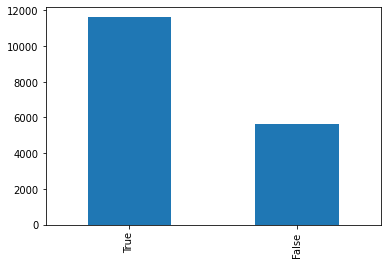

In [18]:
# a plot example
reports['isActive'].value_counts().plot(kind='bar')

In [19]:
activeReports = reports[reports['isActive']]

In [20]:
activeReports.shape

(11605, 19)

Storing a dataset with only active reports.

In [21]:
activeReports.to_csv("./datasets/active_reports_180.csv", index=False)

## Filtering events_reports by Lighting type

In [22]:
reports_event = pd.read_csv("data/Salesforce/Objects/ReportEvent_50k_Sample.csv")

/tmp/ipykernel_39616/427543989.py:1: DtypeWarning: Columns (2,3,11,22) have mixed types. Specify dtype option on import or set low_memory=False.
  reports_event = pd.read_csv("data/Salesforce/Objects/ReportEvent_50k_Sample.csv")


In [23]:
list(reports_event.columns)

['ColumnHeaders',
 'CreatedDate',
 'DashboardId',
 'DashboardName',
 'Description',
 'DisplayedFieldEntities',
 'EvaluationTime',
 'EventDate',
 'EventIdentifier',
 'EventSource',
 'ExecutionIdentifier',
 'ExportFileFormat',
 'Format',
 'GroupedColumnHeaders',
 'Id',
 'IsScheduled',
 'LoginHistoryId',
 'LoginKey',
 'Name',
 'NumberOfColumns',
 'Operation',
 'OwnerId',
 'PolicyOutcome',
 'QueriedEntities',
 'Records',
 'RelatedEventIdentifier',
 'ReportId',
 'RowsProcessed',
 'Scope',
 'Sequence',
 'SessionKey',
 'SessionLevel',
 'SourceIp',
 'UserId',
 'Username']

In [24]:
reports_event.head()

,ColumnHeaders,CreatedDate,DashboardId,DashboardName,Description,DisplayedFieldEntities,EvaluationTime,EventDate,EventIdentifier,EventSource,...,RelatedEventIdentifier,ReportId,RowsProcessed,Scope,Sequence,SessionKey,SessionLevel,SourceIp,UserId,Username
0,"[UserServicePresence.StatusStartDate, UserServ...",2022-06-01T13:10:40.563Z,NaN,NaN,NaN,"User,UserServicePresence,ServicePresenceStatus",0.0,2022-06-01T13:10:39.103Z,1d6ab64e-3037-4b55-adde-aa201e6c837a,Classic,...,NaN,00O0b000004kkZKEAY,0.0,organization,1,NaN,NaN,NaN,0050b0000046hqjAAA,mayank.kaushal@dell.com.dellservices
1,"[UserServicePresence.StatusStartDate, UserServ...",2022-05-26T12:48:49.891Z,NaN,NaN,NaN,"User,UserServicePresence,ServicePresenceStatus",0.0,2022-05-26T12:48:48.928Z,2da2bd62-c797-4dfd-ae59-e780e49637a1,Classic,...,NaN,00O0b000004kkZKEAY,0.0,organization,1,NaN,NaN,NaN,0050b0000046hqjAAA,mayank.kaushal@dell.com.dellservices
2,"[UserServicePresence.StatusStartDate, UserServ...",2022-05-25T13:22:26.467Z,NaN,NaN,NaN,"User,UserServicePresence,ServicePresenceStatus",0.0,2022-05-25T13:22:18.205Z,4c39d2ef-bd8d-4e38-8183-f41222e150b1,Classic,...,NaN,00O0b000004kkZKEAY,0.0,organization,1,NaN,NaN,NaN,0050b0000046hqjAAA,mayank.kaushal@dell.com.dellservices
3,"[Case.CaseNumber, Case.Subject, Case.Case_Age_...",2022-05-24T12:51:48.336Z,NaN,NaN,NaN,"Activity,Case",0.0,2022-05-24T12:51:41.742Z,537421ae-517f-473d-820d-50823f0f26b2,Classic,...,NaN,00O0b000004kTazEAE,4.0,user,1,NaN,NaN,NaN,0050b0000046hqjAAA,mayank.kaushal@dell.com.dellservices
4,"[CASE_NUMBER, SUBJECT, EMAIL.MESSAGE_DATE, EMA...",2022-05-24T12:51:50.365Z,NaN,NaN,What are the incoming emails on cases that I'm...,"EmailMessage,Case",0.0,2022-05-24T12:51:41.593Z,c97f1d48-374f-4f2b-a673-8120a42b65b9,Classic,...,NaN,00O0b000004kpcxEAA,0.0,user,1,NaN,NaN,NaN,0050b0000046hqjAAA,mayank.kaushal@dell.com.dellservices


In [25]:
reports_event.shape

(50000, 35)

 Filtering lightning reports from reports_event

In [26]:
lightning_reports = reports_event[(reports_event['EventSource'] == 'Lightning')]

Sorted values by EventDate

In [27]:
sortedByEventDate = lightning_reports.sort_values('EventDate', ascending=False)

Let's go over a new reference date and a time window to consider active reports.

- The reference date may be the most recent date in our sample.
- Considering a range of 30 in this analysis.

As the reports are sorted by EventDate, our reference date is the first row of the dataframe.


In [28]:
dateStr = sortedByEventDate['EventDate'].iloc[0][:-1] # Removing trelling 'Z'
dateStr

'2022-06-19T21:38:10.334'

Filtering all reports that were edited/run in the last 30 days

In [29]:
elapsedDays = 30

Creating a fuction to filter this actives reports

In [30]:
def filterActiveEventsReports(eventDate):
    dateStr = eventDate[:-1] # removing trailing 'Z'
    timedelta = referenceDate - datetime.fromisoformat(dateStr).date()
    return timedelta.days <= elapsedDays 

Creating a column for active reports

In [31]:
lightning_reports['isActive'] = lightning_reports['EventDate'].apply(filterActiveEventsReports)

/tmp/ipykernel_39616/3715643370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lightning_reports['isActive'] = lightning_reports['EventDate'].apply(filterActiveEventsReports)


In [32]:
lightning_reports['isActive'].value_counts()

False    24920
True      5322
Name: isActive, dtype: int64

<AxesSubplot:>

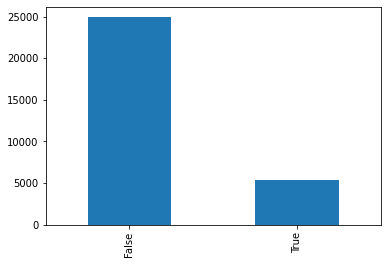

In [33]:
lightning_reports['isActive'].value_counts().plot(kind='bar')

Checking if there was any update through the RowsProcessed column

In [42]:
active_lightning_reports = lightning_reports.loc[(reports_event['RowsProcessed'] > 0)]

 Grouping the table by UserId and SessionKey

In [48]:
columns = ['RowsProcessed', 'ReportId', 'Sequence', 'UserId', 'SessionKey'] 
groupbyOfLightning = active_lightning_reports.groupby(['UserId', 'SessionKey']).agg({'ReportId': 'count',
                                                                                    'RowsProcessed': 'sum',
                                                                                    'Sequence': 'count'})

In [40]:
groupbyOfLightning.reset_index()

,UserId,SessionKey,ReportId,RowsProcessed,Sequence
0,0050b0000046huMAAQ,/x8R+TSdPKm+Qdv3,10,73160.0,10
1,0050b0000046huMAAQ,1SYYBXzUmlF/tWnA,5,51455.0,5
2,0050b0000046huMAAQ,1cWFIMsETtLrXM6o,4,501.0,4
3,0050b0000046huMAAQ,4DKiOqb1R+Pdzuav,6,339.0,6
4,0050b0000046huMAAQ,7bPknSOYOH71Bbj9,12,113826.0,12
...,...,...,...,...,...
1503,0050b000004K0zFAAS,r377uI140lvTplnF,6,1030.0,6
1504,0050b000004K0zFAAS,sD+efawoH3Ci4Qit,46,8412.0,46
1505,0050b000004K0zFAAS,t307Y2atZ3jKDv7u,73,61697.0,73
1506,0050b000004K0zFAAS,uCPHPkm1Mz/1T+F1,21,3816.0,21


In [64]:
list(reports.columns)

['CreatedById',
 'CreatedDate',
 'Description',
 'DeveloperName',
 'FolderName',
 'Format',
 'Id',
 'IsDeleted',
 'LastModifiedById',
 'LastModifiedDate',
 'LastReferencedDate',
 'LastRunDate',
 'LastViewedDate',
 'Name',
 'NamespacePrefix',
 'OwnerId',
 'ReportTypeApiName',
 'SystemModstamp',
 'isActive']

In [83]:
#groupLighinint = groupbyOfLightning.rename(columns={'UserId': 'OwnerId'}, inplace = True)
groupbyOfLightning.reset_index()

,UserId,SessionKey,ReportId,RowsProcessed,Sequence
0,0050b0000046huMAAQ,/x8R+TSdPKm+Qdv3,10,73160.0,10
1,0050b0000046huMAAQ,1SYYBXzUmlF/tWnA,5,51455.0,5
2,0050b0000046huMAAQ,1cWFIMsETtLrXM6o,4,501.0,4
3,0050b0000046huMAAQ,4DKiOqb1R+Pdzuav,6,339.0,6
4,0050b0000046huMAAQ,7bPknSOYOH71Bbj9,12,113826.0,12
...,...,...,...,...,...
1503,0050b000004K0zFAAS,r377uI140lvTplnF,6,1030.0,6
1504,0050b000004K0zFAAS,sD+efawoH3Ci4Qit,46,8412.0,46
1505,0050b000004K0zFAAS,t307Y2atZ3jKDv7u,73,61697.0,73
1506,0050b000004K0zFAAS,uCPHPkm1Mz/1T+F1,21,3816.0,21


In [82]:
list(groupLighinint.columns)

AttributeError: 'NoneType' object has no attribute 'columns'

In [62]:
m = pd.merge(reports, groupbyOfLightning)

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False